In [ ]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

# **Exercise 1: Exploratory Analysis on Rossman GmbH data**

## **Part A: Interesting**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Can-Berk/Machine_Learning_Labs/main/Datasets/train_rossman.csv', engine='python', sep=",")
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### *Store that has the maximum sale recorded*

In [ ]:
max_sales=data.loc[data['Sales'].idxmax()]
print(data.loc[data['Sales'].idxmax()])

Store                   909
DayOfWeek                 1
Date             2015-06-22
Sales                 41551
Customers              1721
Open                      1
Promo                     0
StateHoliday              0
SchoolHoliday             0
Name: 44393, dtype: object


In [ ]:
print("Sale record Store info:\n",max_sales[["Store", "Date", "Sales"]])

Sale record Store info:
 Store           909
Date     2015-06-22
Sales         41551
Name: 44393, dtype: object


### *Store that has the maximum sale recorded*

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/Can-Berk/Machine_Learning_Labs/main/Datasets/store_rossman.csv', engine='python', sep=",")
data2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
print(data2["CompetitionDistance"].agg(['max', 'min']))

max    75860.0
min       20.0
Name: CompetitionDistance, dtype: float64


In [ ]:
data2.loc[data2['CompetitionDistance'].idxmax()]

Store                          453
StoreType                        a
Assortment                       c
CompetitionDistance          75860
CompetitionOpenSinceMonth      NaN
CompetitionOpenSinceYear       NaN
Promo2                           0
Promo2SinceWeek                NaN
Promo2SinceYear                NaN
PromoInterval                  NaN
Name: 452, dtype: object

In [ ]:
least_cd=data2[data2['CompetitionDistance']==data2['CompetitionDistance'].max()]
print(least_cd)

     Store StoreType Assortment  CompetitionDistance  \
452    453         a          c              75860.0   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
452                        NaN                       NaN       0   

     Promo2SinceWeek  Promo2SinceYear PromoInterval  
452              NaN              NaN           NaN  


In [ ]:
data2[data2['CompetitionDistance']==data2['CompetitionDistance'].min()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
515,516,a,c,20.0,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Store 453 has the max Competition distance with 75860 units and Store 516 has the least Competition distance with 20 units.

### *Store that has the maximum sale recorded*

In [ ]:
#data.loc[(data['Promo'].count().max ) & (data['Promo'] == 1)]
#interval

In [ ]:
promos=data.groupby('Promo')['Sales'].mean()
print(promos)

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64


In [ ]:
no_promo=promos[0]
have_promo=promos[1]
print("Mean difference between in sales when having promo and no promo is=",have_promo-no_promo)

Mean difference between in sales when having promo and no promo is= 3585.1012408091174


### *Store that has the maximum sale recorded*

In [ ]:
Anomaly1=data[data.Sales == 0].groupby('Open').Sales.count().reset_index()
print(Anomaly1)

   Open   Sales
0     0  172817
1     1      54


In [ ]:
#Yes, 54 times sales havent made when Store was open

In [ ]:
Anomaly2=data[data.Sales != 0].groupby('Open').Sales.count().reset_index()
print(Anomaly2)

   Open   Sales
0     1  844338


In [ ]:
#No anomalies when sales made whether store was open or closed

### *Store that has the maximum sale recorded*

In [ ]:
from itertools import cycle

storetype_list=data2['StoreType']
print("Lenght of Store_types=",len(storetype_list))

Lenght of Store_types= 1115


In [ ]:
storetype_list = cycle(storetype_list)                      #To have repeating StoreTypes for corresponding store
data.head()
data['StoreType'] = [next(storetype_list) for i in range(len(data))]
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType
0,1,5,2015-07-31,5263,555,1,1,0,1,c
1,2,5,2015-07-31,6064,625,1,1,0,1,a
2,3,5,2015-07-31,8314,821,1,1,0,1,a
3,4,5,2015-07-31,13995,1498,1,1,0,1,c
4,5,5,2015-07-31,4822,559,1,1,0,1,a
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a
1017205,1112,2,2013-01-01,0,0,0,0,a,1,d
1017206,1113,2,2013-01-01,0,0,0,0,a,1,c
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a


In [ ]:
data.groupby('StoreType').Sales.agg('count').sort_values(ascending=False).reset_index()

,StoreType,Sales
0,a,549205
1,d,317486
2,c,135010
3,b,15508


In [ ]:
# A type stores have the most sales. B type store sales are significantly low.

## **Part B: Details on Stats Plots**

### *On a monthly basis how do the mean of sales vary (across all stores)?*

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
monthly=data.groupby(pd.Grouper(key='Date', freq='1M'))['Sales'].sum().reset_index()
print(monthly.head())

        Date      Sales
0 2013-01-31  180132207
1 2013-02-28  171534275
2 2013-03-31  201180369
3 2013-04-30  183431432
4 2013-05-31  185411063


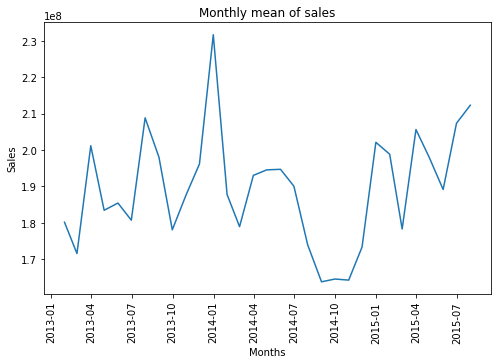

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(monthly['Date'], monthly['Sales'])
plt.xticks(rotation='vertical')
plt.title('Monthly mean of sales')
plt.xlabel('Months')
plt.ylabel('Sales')         #
plt.show()

In [ ]:
#35% difference between most and least sales made in a month.

### *On a daily basis how do the mean of sales vary (across all stores)?*

In [ ]:
daily=data.groupby(pd.Grouper(key='Date', freq='1D'))['Sales'].mean().reset_index()
print(daily.head())

        Date        Sales
0 2013-01-01    87.284560
1 2013-01-02  6233.030493
2 2013-01-03  5693.112108
3 2013-01-04  5954.218834
4 2013-01-05  5337.751570


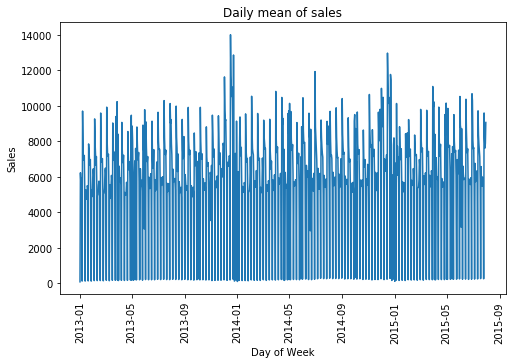

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(daily['Date'], daily['Sales'])
plt.xticks(rotation='vertical')
plt.title('Daily mean of sales')
plt.xlabel('Day of Week')
plt.ylabel('Sales')         #
plt.show()

In [ ]:
da=data.groupby("DayOfWeek")["Sales"].mean().reset_index()
da

,DayOfWeek,Sales
0,1,7809.044510
1,2,7005.244467
2,3,6555.884138
3,4,6247.575913
4,5,6723.274305
5,6,5847.562599
6,7,204.183189


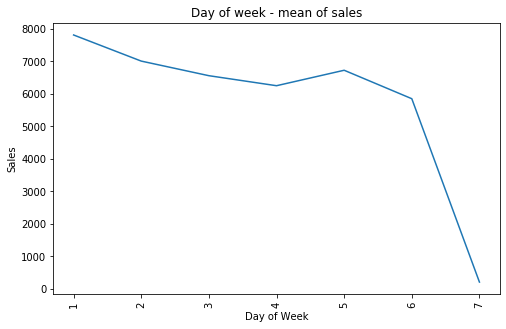

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(da['DayOfWeek'], da['Sales'])
plt.xticks(rotation='vertical')
plt.title('Day of week - mean of sales')
plt.xlabel('Day of Week')
plt.ylabel('Sales')         #
plt.show()

In [ ]:
#At the start of the day there are more sales. It might be caused by the fact that store is closed on Sunday and people need items more than usual on mondays.

In [ ]:
Store1=data[data.Store == 1].groupby('Date').Sales.sum().reset_index()
Store1=Store1.iloc[-365:]          #1 year period
print(Store1)

          Date  Sales
577 2014-08-01   5038
578 2014-08-02   4731
579 2014-08-03      0
580 2014-08-04   5655
581 2014-08-05   5433
..         ...    ...
937 2015-07-27   6102
938 2015-07-28   5011
939 2015-07-29   4782
940 2015-07-30   5020
941 2015-07-31   5263

[365 rows x 2 columns]


### *For the first store id, plot it’s cumulative sales for the first year*

In [ ]:
Store1_cumulative=np.cumsum(Store1["Sales"]).reset_index()
Store1_cumulative

,index,Sales
0,577,5038
1,578,9769
2,579,9769
3,580,15424
4,581,20857
...,...,...
360,937,1396407
361,938,1401418
362,939,1406200
363,940,1411220


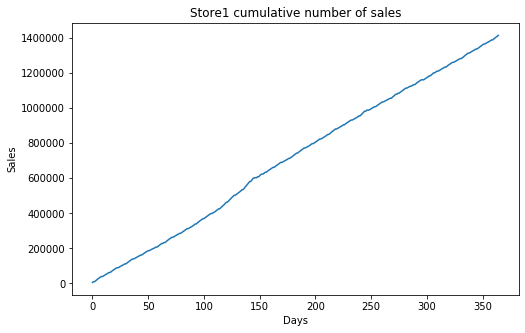

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(Store1_cumulative['Sales'])
plt.title('Store1 cumulative number of sales')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

In [ ]:
#Sales for store 1 grows linearly

Plot and comment on the following relationships

1.   Customers(x-axis) vs. sales(y-axis)
2.   Competitiondistance(x-axis) vs. sales(y-axis)



In [ ]:
Sales_d=data.groupby('Date')['Sales'].sum()         #Sales by days

In [ ]:
Customers_d=data.groupby('Date')['Customers'].sum()   #Customer numbers by days

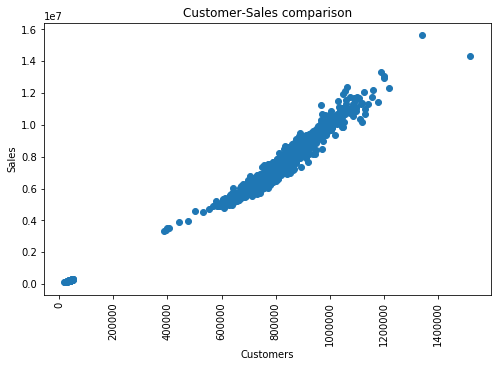

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(Customers_d,Sales_d)
plt.title('Regression basic scatter')
plt.xticks(rotation='vertical')
plt.title('Customer-Sales comparison')
plt.xlabel('Customers')
plt.ylabel('Sales')         #
plt.show()

In [ ]:
#Sales are increasing as customer number increases as expected.

In [ ]:
data["CompetitionDistance"]=data2["CompetitionDistance"]         #To have repeating CompetitionDistance for corresponding store
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,CompetitionDistance
0,1,5,2015-07-31,5263,555,1,1,0,1,c,1270.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,570.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,14130.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,620.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,29910.0


In [ ]:
compdist_list=data2['CompetitionDistance']
print(len(compdist_list))

1115


In [ ]:
compdist_list = cycle(compdist_list)
data['compdist_list'] = [next(compdist_list) for i in range(len(data))]
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,CompetitionDistance,compdist_list
0,1,5,2015-07-31,5263,555,1,1,0,1,c,1270.0,1270.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,570.0,570.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,14130.0,14130.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,620.0,620.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,29910.0,29910.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,NaN,350.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,d,NaN,10070.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,c,NaN,1390.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,NaN,3130.0


In [ ]:
#Compdist_d=data.groupby('Store')['compdist_list']
Compdist_d=data["compdist_list"][:1115]              #Store competition distances choosen for one time. No need loop
Compdist_d

0        1270.0
1         570.0
2       14130.0
3         620.0
4       29910.0
         ...   
1110     1900.0
1111     1880.0
1112     9260.0
1113      870.0
1114     5350.0
Name: compdist_list, Length: 1115, dtype: float64

In [ ]:
Sales_d2=data.groupby('Store')['Sales'].sum()
print(Sales_d2.head())

Store
1    3716854
2    3883858
3    5408261
4    7556507
5    3642818
Name: Sales, dtype: int64


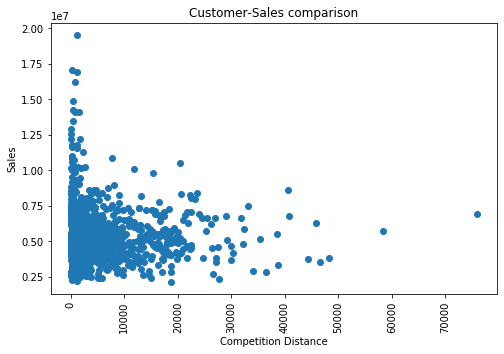

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(Compdist_d,Sales_d2)
plt.title('Regression basic scatter')
plt.xticks(rotation='vertical')
plt.title('Customer-Sales comparison')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Even though it is not obvious, it seems like lower competition distance leads to more sales.

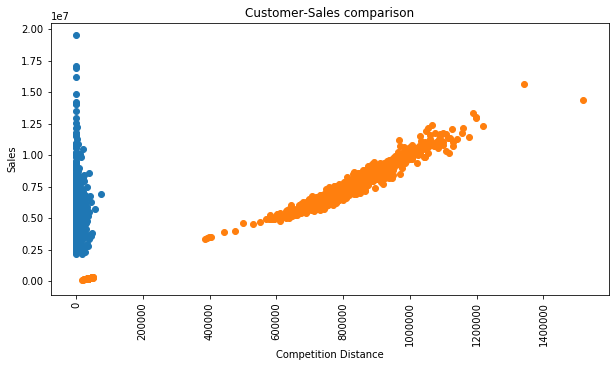

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))       #2 plots together
plt.scatter(Compdist_d,Sales_d2)
plt.scatter(Customers_d,Sales_d)
plt.title('Regression basic scatter')
plt.xticks(rotation='vertical')
plt.title('Customer-Sales comparison')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

### *Plot an array of Pearson correlations between all features*

In [ ]:
data_merged=data.merge(data2, on='Store')        #train and store datasets are merged
data_merged[:300]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,4,2014-10-09,4654,527,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
296,1,3,2014-10-08,4944,518,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
297,1,2,2014-10-07,5439,556,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
298,1,1,2014-10-06,5402,608,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
pearsoncorr = data_merged.corr(method='pearson')           #pearson correlation
pearsoncorr

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


In [ ]:
#High correlation between Customers and Sales 0.894711 as seen in the above scatter plot. CompetitionDistance and Sales are negatively correlated and not that important -0.019229. Promotion increases sales (0.452345 pcorr). 

### *For the first 10 stores (id’ed) draw boxplots of their sales*

In [ ]:
Sales10=data.groupby('Store')['Sales'].sum() 
Sales10=Sales10[:10]
print(Sales10)

Store
1     3716854
2     3883858
3     5408261
4     7556507
5     3642818
6     4297758
7     6930202
8     4342857
9     5112061
10    4365642
Name: Sales, dtype: int64


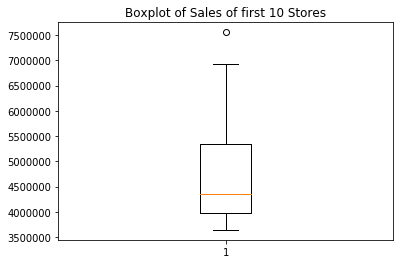

In [ ]:
plt.figure()
plt.boxplot(Sales10)
plt.title('Boxplot of Sales of first 10 Stores')
plt.show()

In [ ]:
# Median (Q2 / 50th percentile). Median of sales are both Store 8 and 10. Highest median is Store 10 with 4365642 sales. Among these 10 stores in the above graph, highest sales are belong to Store 4 with 7556507 sales which can be seen as circle (Outlier) on the upper part of boxplot.

# **Exercise 2: Linear Regression Implementation**

## **Part A: Implement (multiple) Linear regression algorithm for 10 features**

### *Generate a simple data i.e. a matrixX with dimensions 100x10 with normal distribution (2, 0.01) and  target vector a matrix Y with dimensions 100x1 with uniform distribution*

In [ ]:
x0=np.ones((100,1))
x1=np.random.normal(2,0.01,(100,10))
X=np.append(x0,x1,axis=1)

In [ ]:
Y=np.random.uniform(0,1,(100))

In [ ]:
#X_test, X_train = np.array_split(X, [int(.1*len(X))])
#y_test, y_train = np.array_split(Y, [int(.1*len(Y))])

In [ ]:
print(X.shape ,Y.shape)

(100, 11) (100,)


### *Implement linear regression algorithm with Gaussian Elemination  and learn parameter values*

In [ ]:
def learn_linreg(X, Y):          #Solve system of linear Equations

    A = np.matmul(X.T, X)
    B = np.matmul(X.T, Y)
    Beta = np.linalg.solve(A, B)
    return Beta, A, B

In [ ]:
Beta_learn,A,B = learn_linreg(X, Y)
print("SLE: {}\n".format(Beta_learn))

SLE: [-6.26942401  1.17540777  2.93790132 -4.8197635  -0.71386205 -3.33983698
 -0.52509774  2.51446838  2.43323334  2.80542836  0.92532109]



In [ ]:
def gaussian(x, y):
    
    beta = np.zeros((len(x),1))
    y = np.split(y,len(y))
    x = np.append(x,y,axis = 1)
    
    for i in range (len(x)-1):                    #zero lower part of the matrix
        for k in range (len(x)-1-i):
            x[k+i+1,] = x[k+i+1,] - ((x[i,] * x[k+i+1, i])/x[i, i])
    for i in reversed(range(1, len(x))):          #zero upper part of the matrix
        for k in reversed(range (i)):
            x[k,] = x[k,] - ((x[i] * x[k, i])/x[i, i])

    x_part = x[:, :-1]
    y_part = x[:, -1]
    

    for i in range (len(x)):         #get beta values
        beta[i] = y_part[i] / x_part[i,i]
    return beta

In [ ]:
left = np.matmul(X.T, X)
right = np.matmul(X.T, Y)

Beta_G = gaussian(left, right)                #Gaussian Elimination method
print("Gaussian: {}\n".format(Beta_G.T))

Gaussian: [[-6.26942401  1.17540777  2.93790132 -4.8197635  -0.71386205 -3.33983698
  -0.52509774  2.51446838  2.43323334  2.80542836  0.92532109]]



### *Implement the corresponding prediction algorithm and plot actual and predicted values from the training points*

In [ ]:
y_pred = np.matmul(X, Beta_learn)
print("Predicted y with SLE:{}\n".format(y_pred))

Predicted y with SLE:[0.48454837 0.48488397 0.52547925 0.51992571 0.47168787 0.32145259
 0.64542852 0.68762835 0.5989825  0.66414591 0.57122273 0.53836299
 0.48783525 0.44151186 0.53068577 0.57517824 0.46416047 0.61469606
 0.50798232 0.44614661 0.66147994 0.5215009  0.559117   0.37279191
 0.43442951 0.47854923 0.46760706 0.32159004 0.51706468 0.48892583
 0.42943129 0.60095218 0.51267892 0.56640326 0.5312771  0.61822208
 0.42051634 0.57874769 0.4908256  0.54825205 0.40139981 0.62689247
 0.57701333 0.44637195 0.61414384 0.68824138 0.54083675 0.45120134
 0.56151708 0.52081997 0.40849243 0.55442569 0.65841563 0.47509158
 0.6066959  0.36434702 0.438752   0.51375521 0.43269015 0.57988351
 0.53233632 0.51656329 0.54205142 0.28836026 0.43326507 0.49923757
 0.57075748 0.51974372 0.60609966 0.49931871 0.55870052 0.46276353
 0.47081187 0.52745839 0.44306531 0.71624936 0.49893368 0.44567697
 0.58813618 0.71475802 0.52667652 0.48236897 0.56668813 0.50282293
 0.5695327  0.46090506 0.52247847 0.69080

In [ ]:
y_pred_G = np.matmul(X, Beta_G)
y_pred_G = y_pred_G[:, 0]
print("Gaussian method Y prediction:{}\n".format(y_pred_G.T))         #Prediction with Gaussian method gives same Y predictions

Gaussian method Y prediction:[0.48454837 0.48488397 0.52547925 0.51992571 0.47168787 0.32145259
 0.64542852 0.68762835 0.5989825  0.66414591 0.57122273 0.53836299
 0.48783525 0.44151186 0.53068577 0.57517824 0.46416047 0.61469606
 0.50798232 0.44614661 0.66147994 0.5215009  0.559117   0.37279191
 0.43442951 0.47854923 0.46760706 0.32159004 0.51706468 0.48892583
 0.42943129 0.60095218 0.51267892 0.56640326 0.5312771  0.61822208
 0.42051634 0.57874769 0.4908256  0.54825205 0.40139981 0.62689247
 0.57701333 0.44637195 0.61414384 0.68824138 0.54083675 0.45120134
 0.56151708 0.52081997 0.40849243 0.55442569 0.65841563 0.47509158
 0.6066959  0.36434702 0.438752   0.51375521 0.43269015 0.57988351
 0.53233632 0.51656329 0.54205142 0.28836026 0.43326507 0.49923757
 0.57075748 0.51974372 0.60609966 0.49931871 0.55870052 0.46276353
 0.47081187 0.52745839 0.44306531 0.71624936 0.49893368 0.44567697
 0.58813618 0.71475802 0.52667652 0.48236897 0.56668813 0.50282293
 0.5695327  0.46090506 0.52247847

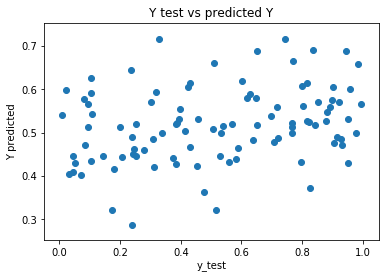

In [ ]:
#normal
plt.scatter(Y, y_pred)                  #Basic - No need
plt.title('Y test vs predicted Y')
plt.xlabel('y_test')
plt.ylabel('Y predicted')
plt.show()

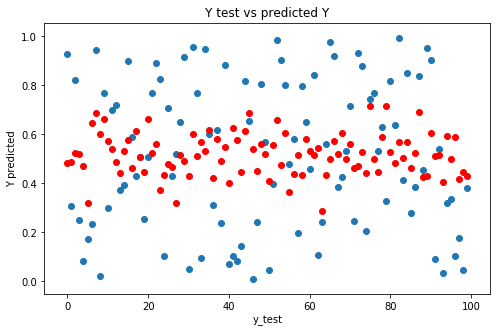

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(range(len(Y)),Y)
plt.scatter(range(len(Y)),y_pred, color="red")
plt.title('Y test vs predicted Y')
plt.xlabel('y_test')
plt.ylabel('Y predicted')
plt.show()

In [ ]:
#We have multiple parameters in this model and thats why this graph seems to get more information compared to simple linear regression which was basically a line to predict. Now model captures more details and fits better.

### *Learn values of B0:10 with numpy.linalg lstsq*

In [ ]:
Replace=np.linalg.lstsq(X,Y, rcond=1) # Use numpy.linalg lstsq to replace step 2 for learning Beta values
print(Replace)

(array([-6.26942401,  1.17540777,  2.93790132, -4.8197635 , -0.71386205,
       -3.33983698, -0.52509774,  2.51446838,  2.43323334,  2.80542836,
        0.92532109]), array([8.23181665]), 11, array([6.40243333e+01, 1.33513919e-01, 1.16887177e-01, 1.12195482e-01,
       1.05545394e-01, 9.58440903e-02, 9.23414613e-02, 8.79592616e-02,
       7.89812078e-02, 7.79217118e-02, 1.53307284e-02]))


## **Part B: Multiple Linear (Auto)Regression**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Can-Berk/Machine_Learning_Labs/main/Datasets/train_rossman.csv', engine='python', sep=",")
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### *Initialize Xtrain, Ytrain, Xtest and Ytest. For the first 1000 stores place all but their last 42 Sales in Xtrain and place the last 42 into Ytrain. Accordingly test data.*

In [ ]:
a=data.sort_values(by=['Store',"Date"],ascending=[True, False])

In [ ]:
a=a.pivot(index='Store', columns='Date', values='Sales')       #Pivoting to get #StoreId and #Days_no matrix
a

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
Store,,,,,,,,,,,,,,,,,,,,,
1,0.0,5530.0,4327.0,4486.0,4997.0,0.0,7176.0,5580.0,5471.0,4892.0,...,3464.0,3769.0,3706.0,4364.0,0.0,6102.0,5011.0,4782.0,5020.0,5263.0
2,0.0,4422.0,4159.0,4484.0,2342.0,0.0,6775.0,6318.0,6763.0,5618.0,...,5093.0,4108.0,3854.0,2512.0,0.0,6627.0,5671.0,6402.0,5567.0,6064.0
3,0.0,6823.0,5902.0,6069.0,4523.0,0.0,12247.0,9800.0,8001.0,7772.0,...,5414.0,5702.0,5080.0,3878.0,0.0,8107.0,8864.0,7610.0,8977.0,8314.0
4,0.0,9941.0,8247.0,8290.0,10338.0,0.0,12112.0,10031.0,8857.0,9472.0,...,8503.0,7286.0,8322.0,9322.0,0.0,11812.0,10275.0,10514.0,10387.0,13995.0
5,0.0,4253.0,3465.0,4456.0,1590.0,0.0,6978.0,5718.0,5974.0,4999.0,...,3595.0,3713.0,3815.0,2030.0,0.0,7059.0,6083.0,5899.0,4943.0,4822.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.0,5097.0,4579.0,4640.0,3325.0,0.0,9444.0,6472.0,5307.0,5887.0,...,4021.0,3587.0,3918.0,2177.0,0.0,7742.0,6793.0,4907.0,5263.0,5723.0
1112,0.0,10797.0,8716.0,9788.0,9513.0,0.0,25165.0,17058.0,14724.0,14366.0,...,6029.0,6730.0,6220.0,6216.0,0.0,14383.0,9583.0,9179.0,9652.0,9626.0
1113,0.0,6218.0,5563.0,5524.0,5194.0,0.0,8984.0,6866.0,6115.0,7508.0,...,4565.0,6410.0,6399.0,4784.0,0.0,7582.0,6468.0,6640.0,7491.0,7289.0


In [ ]:
#a.loc[~(a==0).all(axis=1)]              #To remove rows with all 0's. Removing stores which has no sale during 942 days. Apperently no needed.

In [ ]:
#a[:1000,900]
#a.iloc[0:1000,:900]
#a.iloc[0:1000,-42:]
#a.iloc[-115:,:900]
a.iloc[-115:,-42]

Store
1001     3240.0
1002     6821.0
1003     4575.0
1004     5640.0
1005     5470.0
         ...   
1111     2738.0
1112     8528.0
1113     5431.0
1114    22183.0
1115     7824.0
Name: 2015-06-20, Length: 115, dtype: float64

In [ ]:
Xtrain=a.iloc[0:1000,:900]     #First 1000 stores with their first 900 day sales
Ytrain=a.iloc[0:1000,-42:]     #First 1000 stores with their remaining 42 day sales
Xtest=a.iloc[-115:,:900]       #Remaining 115 stores with their 900 day sales
Ytest=a.iloc[-115:,-42:]       #Remaining 115 stores with their last 42 day sales

In [ ]:
x0=np.ones((1000,1))                        
x_0=np.ones((115,1))
Xtrain=np.append(x0,Xtrain,axis=1)
Xtest=np.append(x_0,Xtest,axis=1)

In [ ]:
print(Xtrain.shape ,Ytrain.shape)
print(Xtest.shape,Ytest.shape)

(1000, 901) (1000, 42)
(115, 901) (115, 42)


In [ ]:
Xtrain[np.isnan(Xtrain)] = 0                #To get rid of nan values. Replaced by 0s.
Xtest[np.isnan(Xtest)] = 0

In [ ]:
#np.linalg.lstsq(Xtrain,Ytrain, rcond=1)          #Checking

### *Build multiple linear regression models for column vectors of Ytrain*

In [ ]:
def learn_linreg(Xtrain, Ytrain):              #To solve linear equations
    X = Xtrain
    Y = Ytrain
    A = np.matmul(X.T, X)
    B = np.matmul(X.T, Y)
    Beta = np.linalg.solve(A, B)
    return Beta, A, B

In [ ]:
Beta_learn,A,B = learn_linreg(Xtrain, Ytrain)
print("SLE: {}\n".format(Beta_learn))

SLE: [[-1.56562281e+02 -3.34914994e-09 -4.87462060e+02 ...  1.94127394e+02
   1.53919012e+02  3.31121174e+02]
 [ 3.08004156e+01 -4.22068051e+01 -2.45249857e+01 ...  5.38849242e+01
   4.94049522e+01  4.18980600e+01]
 [-7.05137095e-02 -7.90615339e-12  5.31182199e-02 ... -6.54029318e-02
  -8.19069486e-02 -1.14832728e-01]
 ...
 [ 4.60704417e-02  1.05695863e-11  1.51375373e-01 ...  5.37204752e-02
   3.11656623e-02 -9.30567606e-02]
 [-1.18492601e-03  2.12000676e-12 -1.55291135e-03 ... -6.57811033e-02
  -4.03682405e-02 -6.43425434e-03]
 [ 1.52937688e-01 -2.08139622e-12  1.44172959e-01 ... -4.65380332e-02
   1.52259699e-02  2.50391431e-03]]



### *Verify that you have learned B0:900 and predictions for each 42 day ahead*

In [ ]:
print("Learned Beta Dimensions=",Beta_learn.shape)

Learned Beta Dimensions= (901, 42)


In [ ]:
y_pred = np.matmul(Xtest, Beta_learn)              #Predictions for remaining stores.
print("Predicted y with SLE:\n {}\n".format(y_pred))

Predicted y with SLE:
 [[ 4.46412310e+03 -3.16163220e-08  5.92771627e+03 ...  6.78037204e+03
   5.94819817e+03  5.15781567e+03]
 [ 6.04345512e+03  1.17319011e-07  4.45863135e+03 ...  6.96181181e+03
   6.83209081e+03  9.66644325e+03]
 [ 3.96512565e+03  3.73892513e-08  3.98662417e+03 ...  7.65837222e+03
   7.12375352e+03  7.72783840e+03]
 ...
 [ 4.37065735e+03 -1.40553211e-07  5.32682976e+03 ...  8.78943127e+03
   7.64300309e+03  7.94611569e+03]
 [ 2.23922423e+04  4.13561927e-07  1.94820325e+04 ...  2.48780436e+04
   2.67152032e+04  3.25386974e+04]
 [ 7.27121199e+03  1.27329159e-08  6.32473539e+03 ...  8.18630801e+03
   8.03664154e+03  7.47230256e+03]]



In [ ]:
print("Predicted Y dimensions=",y_pred.shape)

Predicted Y dimensions= (115, 42)


In [ ]:
y_pred[np.isnan(y_pred)] = 0         #To get rid of nan values. Replaced by 0s.

In [ ]:
y_pred[10:]

array([[ 8.81431561e+03, -2.31650668e-09,  8.13722451e+03, ...,
         6.44901151e+03,  7.53859371e+03,  9.92950219e+03],
       [ 5.60787405e+03,  9.90754238e-08,  3.43928483e+03, ...,
         5.41888082e+03,  6.17199308e+03,  8.12327811e+03],
       [ 2.46580260e+03, -2.04793461e-08,  3.65278458e+03, ...,
         3.44639329e+03,  3.59923713e+03,  4.23122902e+03],
       ...,
       [ 4.37065735e+03, -1.40553211e-07,  5.32682976e+03, ...,
         8.78943127e+03,  7.64300309e+03,  7.94611569e+03],
       [ 2.23922423e+04,  4.13561927e-07,  1.94820325e+04, ...,
         2.48780436e+04,  2.67152032e+04,  3.25386974e+04],
       [ 7.27121199e+03,  1.27329159e-08,  6.32473539e+03, ...,
         8.18630801e+03,  8.03664154e+03,  7.47230256e+03]])

### *Print one value for RMSE and MAE each by aggregating the errors for all 42 days*

In [ ]:
res=Ytest-y_pred
#print("Residuals:" + str(np.mean(res)))

def mae(Ytest,y_pred):
    return np.mean(abs(Ytest-y_pred), axis=0)

def RMSE(x, y):
    return np.sqrt(np.mean((x-y)**2))

print("MAE=",mae(Ytest,y_pred).mean())
print("RMSE=",RMSE(Ytest,y_pred).mean())


MAE= 6938.620741741898
RMSE= 42546.337245752824


In [ ]:
from sklearn import metrics as mt
from math import sqrt
print("MAE=",mt.mean_absolute_error(Ytest,y_pred))                #To confirm
#print("RMSE=",sqrt(mt.mean_squared_error(Ytest,y_pred)))

MAE= 6938.620741741899


In [ ]:
print("Error for 42 days=:" + str(np.mean(res)))

Error for 42 days=:Date
2015-06-20     3927.374523
2015-06-21    -6672.417645
2015-06-22    -6021.879352
2015-06-23     2970.312490
2015-06-24       95.066299
2015-06-25     6117.306999
2015-06-26     3059.178388
2015-06-27    -4668.497745
2015-06-28   -10176.925613
2015-06-29    28326.397956
2015-06-30    -7228.106777
2015-07-01     1280.971852
2015-07-02    -5608.491057
2015-07-03    -3086.688540
2015-07-04    -1616.982520
2015-07-05     5159.149569
2015-07-06    -9319.442572
2015-07-07    -4060.057887
2015-07-08    11692.667609
2015-07-09     4172.346952
2015-07-10      135.511080
2015-07-11    -3947.035418
2015-07-12     2300.342160
2015-07-13    -1821.073153
2015-07-14    -5623.017299
2015-07-15    -6471.757935
2015-07-16   -14307.507577
2015-07-17    -4307.492194
2015-07-18     -672.622612
2015-07-19   -15706.049445
2015-07-20     3137.357390
2015-07-21     -184.378828
2015-07-22     4842.765778
2015-07-23    -2908.196570
2015-07-24     1919.043879
2015-07-25     3514.030880
2015

In [ ]:
print("Mean of sales horizon=",np.sum(Ytest.mean())/len(Ytest))

Mean of sales horizon= 2213.331266540643


In [ ]:
print("Reason:\nCompared to Simple Linear Regression, now we have more parameters and it increases the complexity of model which allows to capture more information on the data. However, Error is very high so there should be better approach than MLR. There are some dummy variables affecting sales like Promo and they could be identified better with logistic regression 0-1. ")

Reason:
Compared to Simple Linear Regression, now we have more parameters and it increases the complexity of model which allows to capture more information on the data. However, Error is very high so there should be better approach than MLR. There are some dummy variables affecting sales like Promo and they could be identified better with logistic regression 0-1. 


In [ ]:
#References
#https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan
#https://stackoverflow.com/questions/63214240/pandas-groupby-when-column-is-a-certain-value
#df['e'] = e
#https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order
#https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas
#https://stackoverflow.com/questions/21068971/how-to-fill-in-rows-with-repeating-data-in-pandas
#https://stackoverflow.com/questions/48956789/converting-nan-in-dataframe-to-zero
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html